In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
data = load_breast_cancer()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data.data, data.target, test_size=0.3)

In [3]:
clf = RandomForestClassifier(random_state=0)
clf.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
print('随机森林：',score_c)

随机森林： 0.9532163742690059


## 二分类ROC曲线和混淆矩阵

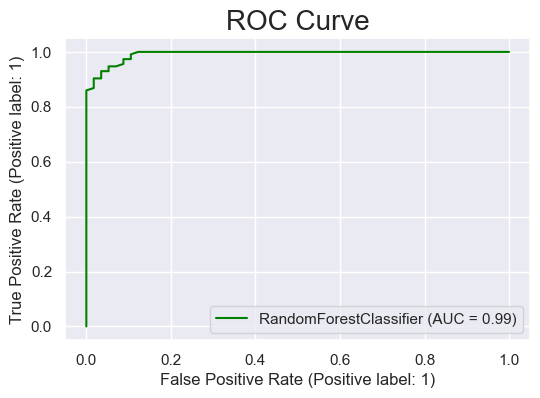

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, axes = plt.subplots(1,1,figsize=(6, 4), dpi=100)
RocCurveDisplay.from_estimator(clf, Xtest, Ytest, ax=axes, color='green')
plt.title('ROC Curve', fontsize=20)
plt.show()

<AxesSubplot:>

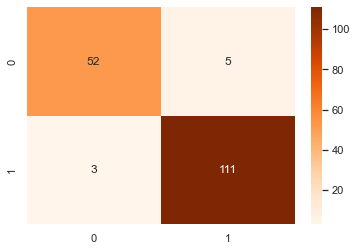

In [5]:
from sklearn.metrics import confusion_matrix
y_true = Ytest
y_pred = clf.predict(Xtest)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, cmap="Oranges", fmt="d", annot=True)

## 交叉验证

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


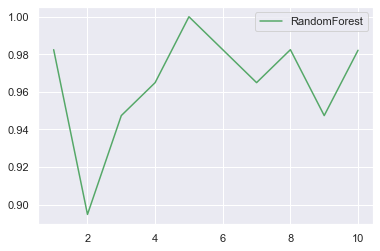

In [6]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=500)
rfc_c = cross_val_score(rfc, data.data, data.target, cv=10)


sns.lineplot(range(1, 11), rfc_c, label="RandomForest", color='g')

plt.legend()
plt.show()